### load forex

we will load the three dataset from single excel file with three sheets, then assign a dataframe for each sheet.

In [101]:
import pandas as pd

df0 = pd.ExcelFile('Forex.xlsx')
df_sheets = df0.sheet_names
df_sheets

['EURUSD', 'EURGBP', 'GBPUSD']

In [102]:
EURUSD = pd.read_excel('Forex.xlsx', sheet_name='EURUSD')
EURGBP = pd.read_excel('Forex.xlsx', sheet_name='EURGBP')
GBPUSD = pd.read_excel('Forex.xlsx', sheet_name='GBPUSD')

select only time and open columns (four different methods)

In [103]:
EURUSD = EURUSD.iloc[:,:2]
EURGBP2=EURGBP;
EURGBP = EURGBP.filter(items=['time', 'open'])
GBPUSD = GBPUSD.drop(['high', 'low', 'close', 'volume'], axis=1)
# EURGBP = EURGBP.loc[-100:, ['time', 'open']]

rename the open columns

In [104]:
EURGBP=EURGBP.rename(columns={"open":"EG"})
EURUSD=EURUSD.rename(columns={"open":"EU"})
GBPUSD=GBPUSD.rename(columns={"open":"GU"})

keep data for 20th august 2020

In [105]:
df1=EURGBP
mask = (df1['time'] >= '2020-08-20') & (df1['time'] < '2020-08-21')
df1=df1.loc[mask]

df2=EURUSD
mask = (df2['time'] >= '2020-08-20') & (df2['time'] < '2020-08-21')
df2=df2.loc[mask]

df3=GBPUSD
mask = (df3['time'] >= '2020-08-20') & (df3['time'] < '2020-08-21')
df3=df3.loc[mask]

check the length of data

In [106]:
s=[df1.shape,df2.shape,df3.shape]
s

[(1438, 2), (1436, 2), (1440, 2)]

since number of data is different, we will use inner join to merge all three data

In [107]:
df12 = pd.merge(df1, df2, how='inner', on="time")
df = pd.merge(df12, df3, how='inner', on="time")
df.head()

,time,EG,EU,GU
0,2020-08-20 00:00:00,0.90341,1.18440,1.31091
1,2020-08-20 00:01:00,0.90350,1.18393,1.31032
2,2020-08-20 00:02:00,0.90338,1.18396,1.31049
3,2020-08-20 00:03:00,0.90364,1.18418,1.31038
4,2020-08-20 00:04:00,0.90370,1.18418,1.31028


### plot data of 20th august

Text(0.5, 1.0, 'GBPUSD')

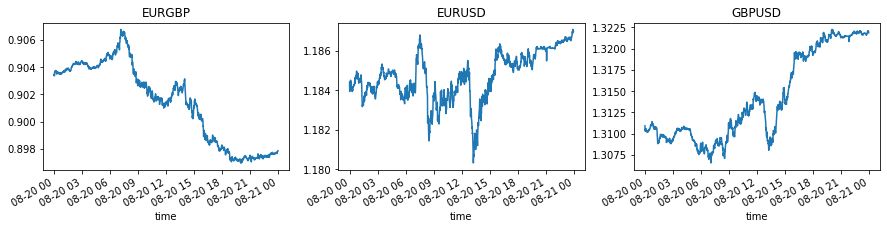

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

df.plot(x='time', y='EG', ax=ax1, legend=False)
df.plot(x='time', y='EU', ax=ax2, legend=False)
df.plot(x='time', y='GU', ax=ax3, legend=False)
ax1.set_title('EURGBP')
ax2.set_title('EURUSD')
ax3.set_title('GBPUSD')

In [109]:
import plotly.graph_objects as go
from datetime import datetime
df2=EURGBP2
mask = (df2['time'] >= '2020-08-20') & (df2['time'] < '2020-08-21')
df2=df2.loc[mask]

fig = go.Figure(data=[go.Candlestick(x=df2['time'],
                open=df2['open'],
                high=df2['high'],
                low=df2['low'],
                close=df2['close'])])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title={'text': "EUR-GBP on 20th august",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()


### save data

working with excel is time consuming, so here we will save the date in csv format.

In [110]:
df.to_csv("Forex.csv",sep=",",index=False,header=True)